# Traditional ML Algorithms

## Algorithms covered

* Linear Regression (L1, L2 regaularized variants)
* Logistic Regression
* Naive Bayes
* Decision Trees (Random forests & Boosting)
* Neural Networks (Regularization(Dropout) Optimizers: SGD, Momentum, AdaGrad, Adam Optimizers)
* Support Vector Machines (including Kernel functions)
* Unsupervised learning: k-nearest neighbours, hierarchical clustering, HNSW, t-SNE
* PCA, LSI, LDA, SVD
* Recommender Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

### Linear Regression

* To model the relationship between a dependent variable (often called the target or outcome) and one or more independent variables (often called features or predictors)
$$ y = \beta_0 + \beta_1 x + \epsilon $$
* Cost function: (Mean Squared Error)
$$ J(\beta_0, \beta_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
$$ \hat{y}_i = \beta_0 + \beta_1 x_i $$
* To find a solution, we optimize the gradients of the loss function (partial derivative) wrt to parameters and upate their values.
$$ \frac{\partial J(\beta_0, \beta_1)}{\partial \beta_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) $$
$$ \frac{\partial J(\beta_0, \beta_1)}{\partial \beta_1} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_i $$

* Start with initial guess, update parameters, we repeat this process until convergence. We introduce a new parameter called learning rate.
$$ \beta_0^{(t+1)} = \beta_0^{(t)} - \eta \cdot \left(-2(y_i - \hat{y}_i)\right) $$

$$ \beta_1^{(t+1)} = \beta_1^{(t)} - \eta \cdot \left(-2(y_i - \hat{y}_i) x_i\right) $$

* Linear Regression assumptions: Independent, no multicollinearity, residuals need to have constant variance (Homoscedasticity), residuals are normally distributed
* Sensitive to outliers
* Feature scaling, applying transformations to input features could be considered, Polynomial features could be added.
* R^2 can be used to understand amount of varaince explained by the model.
$$ \text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

$$ \text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

$$ R^2 = 1 - \frac{\text{SSE}}{\text{SST}} $$

In [59]:
# generate some random data
x = np.random.rand(100)
y = 10 * x + 5 + np.random.randn(100)

# Initialize parameters (beta_0, beta_1)
beta_0 = 0.1
beta_1 = 0.1

# Set learning rate
eta = 0.01
n_epochs = 100

In [61]:
loss = []
for each_epoch in range(n_epochs):
    for i in range(len(x)):
        x_selected = x[i]
        y_selected = y[i]
        y_pred = beta_0 + beta_1 * x_selected
        # gradient step
        grad_beta_0 = -2 * (y_selected - y_pred)
        grad_beta_1 = -2 * (y_selected - y_pred) * x_selected
        # update parameters
        beta_0 -= eta * grad_beta_0
        beta_1 -= eta * grad_beta_1
    # append loss
    y_pred_full = beta_0 + beta_1 * x
    loss_epoch = np.mean((y - y_pred_full) ** 2)
    loss.append(loss_epoch)

In [62]:
beta_0, beta_1

(5.058942006711705, 9.619030069226739)

In [63]:
loss_epoch

0.9732692284809678

<Axes: >

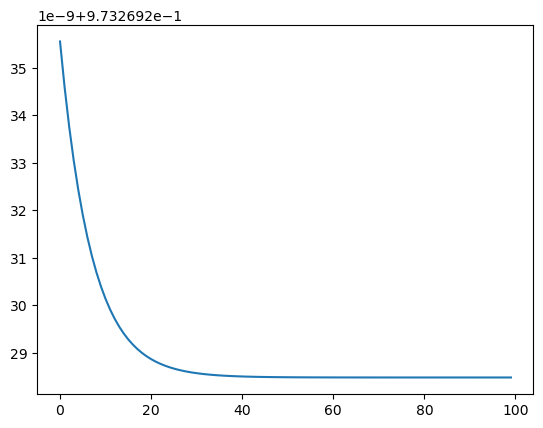

In [64]:
sns.lineplot(loss)

In [65]:
def r2_score(y_true, y_pred):
    y_mean = np.mean(y_true)
    sst = np.sum((y_true - y_mean) ** 2)
    sse = np.sum((y_true - y_pred) ** 2)
    return 1 - (sse / sst)

In [66]:
y_pred_full = beta_0 + beta_1 * x 

In [67]:
r2_score(y, y_pred_full)

0.8992275529429388

<Axes: ylabel='Density'>

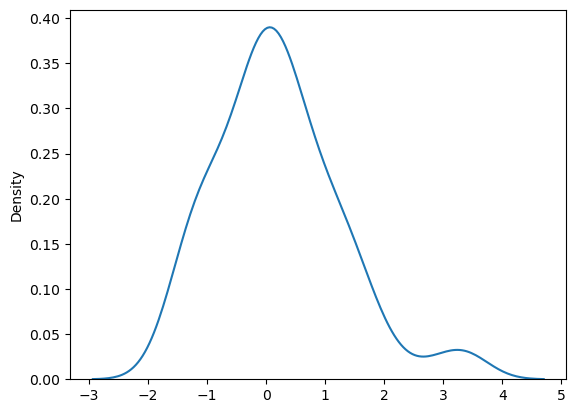

In [110]:
# residuals are normally distributed
sns.kdeplot((y - y_pred_full))

In [129]:
# variance of residuals should be constant
for sample in range(5):
    print(np.var(np.random.choice(y - y_pred_full,size=10)))

0.3857018947900344
0.3992941212327826
0.40588624673642143
1.5575360359848107
1.417970368656634


#### Regularization

* L1: Add a penalty proportional to the absolute values of the coefficients.
$$ J(\beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j| $$
* L2: Add a penalty proportional to the square of values of the coefficients.
$$ J(\beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 $$
* L1 can drive some coefficient to zero, could be useful in feature selection.

### L1 implementation

In [90]:
# generate some random data
x = np.random.rand(100)
y = 10 * x + 5 + np.random.randn(100)

# Initialize parameters (beta_0, beta_1)
beta_0 = 0.1
beta_1 = 0.1

# Set learning rate
eta = 0.01
n_epochs = 100

loss = []
l1 = 0.5
for each_epoch in range(n_epochs):
    for i in range(len(x)):
        x_selected = x[i]
        y_selected = y[i]
        y_pred = beta_0 + beta_1 * x_selected
        # gradient step
        # l1 regularization
        grad_beta_0 = -2 * (y_selected - y_pred) + l1 * np.sign(beta_0)
        grad_beta_1 = -2 * (y_selected - y_pred) * x_selected + l1 * np.sign(beta_1)
        # update parameters
        beta_0 -= eta * grad_beta_0
        beta_1 -= eta * grad_beta_1
    # append loss
    y_pred_full = beta_0 + beta_1 * x
    loss_epoch = np.mean((y - y_pred_full) ** 2)
    loss.append(loss_epoch)

<Axes: >

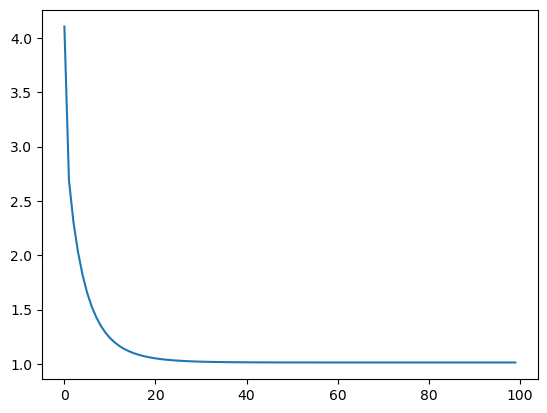

In [91]:
sns.lineplot(loss)

### L2 implementation

In [102]:
# generate some random data
x = np.random.rand(100)
y = 10 * x + 5 + np.random.randn(100)

# Initialize parameters (beta_0, beta_1)
beta_0 = 0.1
beta_1 = 0.1

# Set learning rate
eta = 0.01
n_epochs = 100

loss = []
l2 = 0.04
for each_epoch in range(n_epochs):
    for i in range(len(x)):
        x_selected = x[i]
        y_selected = y[i]
        y_pred = beta_0 + beta_1 * x_selected
        # gradient step
        # l1 regularization
        grad_beta_0 = -2 * (y_selected - y_pred) + 2 * l2 * beta_0
        grad_beta_1 = -2 * (y_selected - y_pred) * x_selected + 2 * l2 * beta_1
        # update parameters
        beta_0 -= eta * grad_beta_0
        beta_1 -= eta * grad_beta_1
    # append loss
    y_pred_full = beta_0 + beta_1 * x
    loss_epoch = np.mean((y - y_pred_full) ** 2)
    loss.append(loss_epoch)

<Axes: >

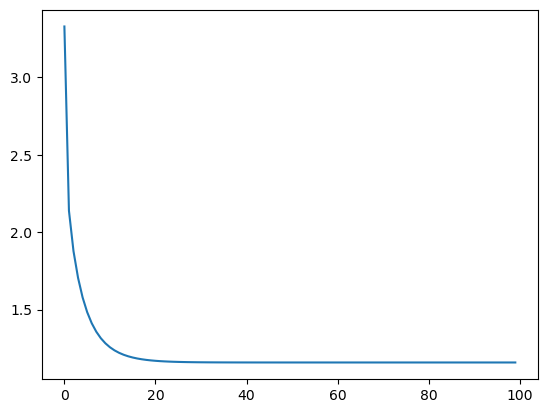

In [103]:
sns.lineplot(loss)

### Logistic Regression

*  Used for predicting the outcome of a categorical dependent variable
$$ \hat{y} = \frac{1}{1 + e^{-(w^T x + b)}} $$
$$ L(y, \hat{y}) = -\sum_{i=1}^n y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i) $$
* Intuition behind Cross-entropy loss: You want to penalize predictions that are incorrect.
    * If True label is 1 and predicted label is 1 => Loss would be close to 0
    * If True label is 0 and predicted label is 1 => Loss woudld be higher.
    * We measure uncertainity (entropy) between true labels and predicted labels, and minimize the uncertainity.
* The output is scaled between [0,1] for any value of X.

In [236]:
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

In [133]:
x = np.linspace(-5,5,100)

In [135]:
sigmoid_x = sigmoid(x)

<Axes: >

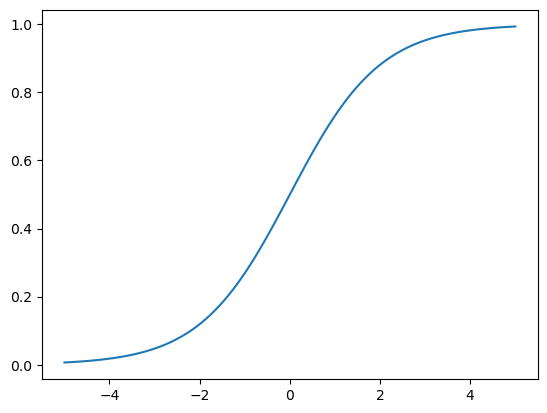

In [137]:
sns.lineplot(x=x,y=sigmoid_x)

Gradients

$$ \frac{\partial L}{\partial w} = -\sum_{i=1}^n (y_i - \hat{y}_i) x_i $$

$$  \frac{\partial L}{\partial b} = -\sum_{i=1}^n (y_i - \hat{y}_i) $$

In [138]:
def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(y_pred))

In [142]:
cross_entropy_loss(np.array([1]),s np.array([0.001]))

6.907755278982137

In [143]:
cross_entropy_loss(np.array([1]), np.array([0.999]))

0.0010005003335835344

In [208]:
def gradient_W(x, y, y_pred):
    return -np.dot(x.T,y-y_pred)

In [209]:
def gradient_b(y, y_pred):
    return -np.sum(y-y_pred)

In [248]:
# create a random dataset
x = np.random.rand(100,6)
print(x.shape)
y = np.random.randint(0,high=2,size=100)
len(y)

(100, 6)


100

In [249]:
w = np.random.randn(6)
b = np.random.randn(1)

In [252]:
# Set learning rate
eta = 0.01
n_epochs = 100

loss = []
for each_epoch in range(n_epochs):
    for i in range(len(x)):
        x_selected = x[[i]]
        y_selected = y[[i]]
        y_pred = sigmoid(np.dot(x_selected, w) + b)
        # gradient step
        # l1 regularization
        grad_w = gradient_W(x_selected, y_selected, y_pred)
        grad_b = gradient_b(y_selected, y_pred)
        # update parameters
        w -= eta * grad_w
        b -= eta * grad_b
    # append loss
    y_pred_full = sigmoid(b + np.dot(x,w))
    loss_epoch = cross_entropy_loss(y, y_pred_full)
    loss.append(loss_epoch)

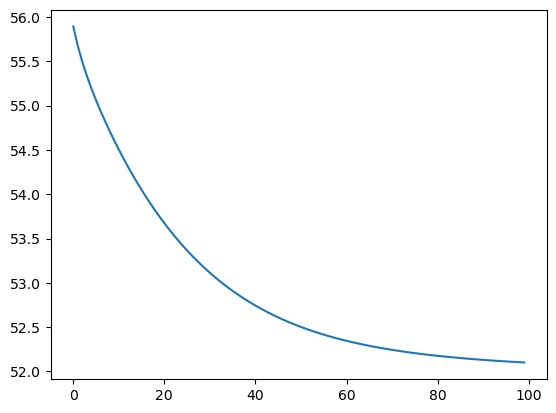

In [253]:
_ = sns.lineplot(loss)

* The exponentiated coefficient (np.exp(coefficient)) gives the odds ratio. An odds ratio greater than 1 indicates that an increase in the predictor increases the odds of the outcome, while an odds ratio less than 1 indicates a decrease.

### Naive Bayes

* Uses Bayes rule to update posterior probabilities using proir
* Naive assumption is that the features are independent given the class label.

$$ P(C|X) = P(X|C) * P(C) / P(X)    $$

$$ P(X \mid C) = P(X_1 \mid C) \cdot P(X_2 \mid C) \cdot \dots \cdot P(X_n \mid C) $$

In [72]:
from collections import defaultdict, Counter

class NaiveBayesClassifier():

    def __init__(self):
        self.prior_probs = {}
        self.likelyhoods = defaultdict(dict)
        self.classes = []
        self.class_word_counts = defaultdict(Counter)
        self.class_totals = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples = len(y)
        
        # compute priors
        for each_class in self.classes:
            self.prior_probs[each_class] = np.sum(y == each_class) / n_samples
            # print(each_class, self.prior_probs)
        # calculate likelyhood
        for c in self.classes:
            X_c = X[y==c]
            word_counts = Counter()
            for doc in X_c:
                word_counts.update(doc)
        
            self.class_word_counts[c] = word_counts
            self.class_totals[c] = sum(word_counts.values())
            
    def predict(self, X):

        predictions = []
        for x in X:
            posterior = {}
            for c in self.classes:
                # adding log to handle underflow
                prior = np.log(self.prior_probs[c])
                for word in x:
                    likelyhood = (self.class_word_counts[c].get(word, 0) + 1) / self.class_totals[c] 
                    likelyhood = np.log(likelyhood)
                    posterior[c] =  prior + likelyhood
            predictions.append(posterior)
        return predictions

In [73]:
# some random examples
X = np.array([
    ["free", "credit", "report", "score"],
    ["hello", "friend", "meeting", "update"],
    ["win", "prize", "lottery", "jackpot"],
    ["project", "delivery", "status", "update"],
    ["cialis", "viagra", "pharmacy", "discount"],
    ["greeting", "card", "birthday", "friend"],
    ["virus", "antivirus", "update", "protect"],
    ["meeting", "schedule", "agenda", "team"],
    ["make", "money", "fast", "online"],
    ["trip", "itinerary", "flight", "hotel"],
    ["pharmacy", "rx", "discount", "meds"],
    ["friend", "request", "connect", "social"],
    ["alert", "warning", "system", "error"],
    ["package", "delivery", "tracking", "status"],
    ["investment", "opportunity", "wealth", "grow"]
])

y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [74]:
nb = NaiveBayesClassifier()

In [75]:
nb.fit(X,y)

In [76]:
nb.classes

array([0, 1])

In [77]:
nb.prior_probs

{0: 0.4666666666666667, 1: 0.5333333333333333}

In [78]:
nb.class_word_counts

defaultdict(collections.Counter,
            {0: Counter({'friend': 3,
                      'meeting': 2,
                      'update': 2,
                      'delivery': 2,
                      'status': 2,
                      'hello': 1,
                      'project': 1,
                      'greeting': 1,
                      'card': 1,
                      'birthday': 1,
                      'schedule': 1,
                      'agenda': 1,
                      'team': 1,
                      'trip': 1,
                      'itinerary': 1,
                      'flight': 1,
                      'hotel': 1,
                      'request': 1,
                      'connect': 1,
                      'social': 1,
                      'package': 1,
                      'tracking': 1}),
             1: Counter({'pharmacy': 2,
                      'discount': 2,
                      'free': 1,
                      'credit': 1,
                      'report': 1,
  

In [79]:
predictions = nb.predict( np.array([
        ['pharmacy', 'lottery', 'investment', 'wealth'],
        ['friend', 'trip', 'update','delivery']
    ]))

In [80]:
predictions

[{0: -4.0943445622221, 1: -3.4011973816621555},
 {0: -2.995732273553991, 1: -4.0943445622221}]

In [81]:
max(predictions[0], key=predictions[0].get)

1

In [82]:
max(predictions[1], key=predictions[1].get)

0

### Decision Trees

* A type of supervised learning model that uses a tree-like structure to classify data or make predictions.
* The Gini impurity, also known as the Gini index or Gini coefficient, is a measure of the impurity or uncertainty of a dataset or a node in a decision tree.
$$I_G(D) = 1 - \sum_{i=1}^C p_i^2$$
    * If the split is perfect => Gini Index = 1 - 1 ** 2 = 0
    * If the split is imperfect => 1 - 0.5 ** 2 - 0.5 ** 2 = 0.5
* Entropy vs Gini index: Both measure impurity of the node. Gini index is slightly faster to compute.
$$ H(X) = - \sum_{x} p(x) \log_2 p(x) $$
* How to handle missing data?
    * Imputation before feeding into the tree
    * Ignore missing data: Don't split on the one where data is missing, consider only the values that are not missing
* How to handle categorical features with lot of levels? Decision trees will struggle here as the tree becomes complex. Good strategy is to reduce the number of levels or group the rare ones into a category "OTHERS".
* Pruning is used to reduce overfitting. You can set stopping criterion like maximum depth of tree, minimum samples per leaf or check impurity decrease.
* Limitatations: Prone to overfitting, somewhat non-smooth predictions
* Feature importances: Total impurity decrease across the entire tree by a feature.
* How to handle regression problems? Instead of Gini-index, use MSE and minimize it. At the end of the tree, use the average value of target as predicted target.
* Handle imbalances in classes: Either by using Oversampling, undersampling. Or modifying the Gini-index calculation towards the minority class.
* Is multi-colinearity a problem? Typically no because decision trees are non-linear models but it would help to remove such features that otherwise complicate the tree structure.

In [83]:
def gini_index(p):
    return 1- np.sum(np.square(p))

In [85]:
dataset = np.random.dirichlet(np.ones(2), 1000)

In [93]:
min([gini_index(x) for x in dataset])

0.002280027443655852

In [95]:
max([gini_index(x) for x in dataset])

0.49999993947724486

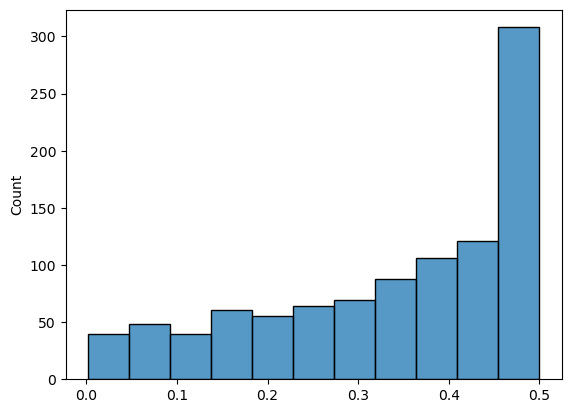

In [98]:
_ = sns.histplot([gini_index(x) for x in dataset])

In [479]:
def class_counts(y):
    classes, counts =  np.unique(y, return_counts=True)
    return {k: v for k, v in zip(classes, counts)}

In [480]:
def gini_impurity(X, y):
    counts = class_counts(y)
    impurity = 1
    for count in counts.values():
        p = count / len(X)
        impurity -= p * p
    return impurity

In [481]:
def get_info_gain(X, y, feature, threshold):
    parent_impurtiy = gini_impurity(X, y)
    left_X, left_y, right_X, right_y = split_dataset(X, y, feature, threshold)
    n_left = len(left_X)
    n_right = len(right_X)
    info_gain = parent_impurtiy - ((n_left/float(len(X)))) * gini_impurity(left_X, left_y) - ((n_right/float(len(X)))) * gini_impurity(right_X, right_y)
    return info_gain

In [650]:
def split_dataset(X, y, feature, threshold):
    left_X = []
    left_y = []
    right_X = []
    right_y = []
    for row, label in zip(X,y):
        # print(row[feature],threshold)
        if row[feature] < threshold:
            left_X.append(row)
            left_y.append(label)
        else:
            right_X.append(row)
            right_y.append(label)
    return np.array(left_X), np.array(left_y), np.array(right_X), np.array(right_y)

In [669]:
def find_best_split(X, y, features):
    best_gain = 0
    best_feature = None
    best_threshold = None
    for each_feature in features:
        # x_values = X[:,each_feature]
        thresholds = list(set(X[:,each_feature]))
        thresholds.sort()
        for threshold in thresholds:
            # print(each_feature, threshold)
            gain = get_info_gain(X, y, each_feature,threshold)
            if gain > best_gain:
                best_gain = gain
                best_feature = each_feature
                best_threshold = threshold
    return best_feature, float(best_threshold)

In [670]:
def decision_tree_learn(X, y,feature_len):
    if len(set(y)) == 1:
        return {'label': y[0]}
    features = list(range(feature_len))
    best_feature, best_threshold = find_best_split(X,y,features)
    left_X,left_y, right_X, right_y = split_dataset(X, y, best_feature, best_threshold)
    tree = {"feature": best_feature, "threshold": best_threshold, 
           "left": decision_tree_learn(left_X,left_y,feature_len),
           "right": decision_tree_learn(right_X, right_y,feature_len)}
    return tree

In [671]:
from sklearn.datasets import load_breast_cancer

In [672]:
ds = load_breast_cancer()

In [673]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [674]:
np.unique(ds['target'])

array([0, 1])

In [675]:
tree = decision_tree_learn(ds['data'], ds['target'], ds['data'].shape[1])

In [676]:
tree

{'feature': 20,
 'threshold': 16.82,
 'left': {'feature': 27,
  'threshold': 0.1359,
  'left': {'feature': 10,
   'threshold': 1.214,
   'left': {'feature': 13,
    'threshold': 38.87,
    'left': {'feature': 14,
     'threshold': 0.003308,
     'left': {'feature': 1,
      'threshold': 21.58,
      'left': {'label': 1},
      'right': {'label': 0}},
     'right': {'feature': 21,
      'threshold': 33.37,
      'left': {'label': 1},
      'right': {'feature': 21,
       'threshold': 33.75,
       'left': {'label': 0},
       'right': {'label': 1}}}},
    'right': {'feature': 5,
     'threshold': 0.06,
     'left': {'label': 0},
     'right': {'feature': 10,
      'threshold': 0.422,
      'left': {'label': 0},
      'right': {'label': 1}}}},
   'right': {'label': 0}},
  'right': {'feature': 21,
   'threshold': 25.84,
   'left': {'feature': 23,
    'threshold': 812.4,
    'left': {'feature': 4,
     'threshold': 0.1278,
     'left': {'label': 1},
     'right': {'label': 0}},
    'right'

In [688]:
def tree_classification(tree, X):
    if 'label' in tree:
        return tree['label']
    feature = tree['feature']
    threshold = tree['threshold']
    if X[feature] < threshold:
        return tree_classification(tree['left'],X)
    else:
        return tree_classification(tree['right'],X)

In [691]:
tree_classification(tree, ds['data'][25])

0

In [693]:
predictions = [tree_classification(tree, x) for x in ds['data']]

In [696]:
np.unique(predictions)

array([0, 1])

In [698]:
# accuracy
(predictions == ds['target']).sum() / ds['target'].shape[0]

1.0

### Random Forests

* Decision Trees + Bagging (randomly sampling the data with replacement) + Random Subspace (features)
* After building collection of trees, you can take a majority voting amonng all trees
* Very accurate and robust since multiple trees are built, not-so prone to overfitting
* Converting previous code into a class

In [793]:
class DecisionTreeClassifier():

    def __init__(self, X, y,feature_len):
        self.X = X
        self.y = y
        self.feature_len = feature_len

    def class_counts(self):
        classes, counts =  np.unique(self.y, return_counts=True)
        return {k: v for k, v in zip(classes, counts)}
        
    def gini_impurity(self):
        counts = class_counts(self.y)
        impurity = 1
        for count in counts.values():
            p = count / len(self.X)
            impurity -= p * p
        return impurity

    def get_info_gain(self, feature, threshold):
        parent_impurtiy = gini_impurity(self.X, self.y)
        left_X, left_y, right_X, right_y = split_dataset(self.X, self.y, feature, threshold)
        n_left = len(left_X)
        n_right = len(right_X)
        info_gain = parent_impurtiy - ((n_left/float(len(self.X)))) * gini_impurity(left_X, left_y) - ((n_right/float(len(self.X)))) * gini_impurity(right_X, right_y)
        return info_gain

    def split_dataset(self, feature, threshold):
        left_X = []
        left_y = []
        right_X = []
        right_y = []
        for row, label in zip(self.X, self.y):
            # print(row[feature],threshold)
            if row[feature] < threshold:
                left_X.append(row)
                left_y.append(label)
            else:
                right_X.append(row)
                right_y.append(label)
        return np.array(left_X), np.array(left_y), np.array(right_X), np.array(right_y)

    def find_best_split(self, features):
        best_gain = 0
        best_feature = None
        best_threshold = None
        for each_feature in features:
            # x_values = X[:,each_feature]
            thresholds = list(set(self.X[:,each_feature]))
            thresholds.sort()
            for threshold in thresholds:
                # print(each_feature, threshold)
                gain = get_info_gain(self.X, self.y, each_feature,threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = each_feature
                    best_threshold = threshold
        return best_feature, float(best_threshold)

    def fit(self):
        if len(set(self.y)) == 1:
            return {'label': y[0]}
        features = list(range(self.feature_len))
        best_feature, best_threshold = find_best_split(self.X,self.y,features)
        left_X,left_y, right_X, right_y = split_dataset(self.X, self.y, best_feature, best_threshold)
        self.tree = {"feature": best_feature, "threshold": best_threshold, 
               "left": decision_tree_learn(left_X,left_y,self.feature_len),
               "right": decision_tree_learn(right_X, right_y,self.feature_len)}

    def predict(self, X_test):
        node = self.tree
        while 'label' not in node:
            feature = self.tree['feature']
            threshold = self.tree['threshold']
            if X_test[feature] < threshold:
                node = node['left']
            else:
                node = node['right']
        return node['label']

In [906]:
dtc = DecisionTreeClassifier(ds['data'], ds['target'],  ds['data'].shape[1])

In [907]:
dtc.fit()

In [908]:
dtc.predict(ds['data'][0])

0

In [909]:
predictions = [dtc.predict(x) for x in ds['data']]

In [910]:
# accuracy
(predictions == ds['target']).sum() / ds['target'].shape[0]

0.9226713532513181

In [926]:
ds['data'].shape

(569, 30)

In [1050]:
from tqdm import tqdm 

class RandomForestClassifier():

    def __init__(self, X, y, n_estimators):
        self.X = X
        self.y = y
        self.n_estimators = n_estimators
        self.estimators = []

    def generate_subset(self):
        # min_features = 3
        # max_features = 15
        features_selected = np.random.randint(15,self.X.shape[1],size=30)
        # min_samples = 50
        # max_samples = 250
        samples_selected = np.random.randint(200,self.X.shape[0],size=500)
        X_bagged = self.X[samples_selected, :]
        X_bagged = X_bagged[:,features_selected]
        y_bagged = self.y[samples_selected]
        return X_bagged, y_bagged, len(features_selected)

    def fit(self):
        print("Buiding Trees...")
        for i in tqdm(range(self.n_estimators)):
            # generate a new dataset
            X_bagged, y_bagged, n_features = self.generate_subset()
            estimator = DecisionTreeClassifier(X_bagged, y_bagged, n_features)
            estimator.fit()
            self.estimators.append(estimator)

    def predict(self,X):
        predictions = []
        for estimator in self.estimators:
            prediction = estimator.predict(X)
            predictions.append(prediction)
        predictions = np.array(predictions)
        return predictions.mean()

In [1053]:
rfc = RandomForestClassifier(ds['data'], ds['target'],  n_estimators=25 )

In [1054]:
rfc.fit()

Buiding Trees...


100%|███████████████████████████████████████████████████████████████████████████████████| 25/25 [02:44<00:00,  6.57s/it]


In [1049]:
rfc.predict(ds['data'][85]).mean()

0.8

In [1055]:
predictions = [rfc.predict(x) for x in ds['data']]

In [1058]:
predictions = [1 if x>=0.5 else 0 for x in predictions ]

In [1060]:
# np.unique(predictions)

In [1061]:
# accuracy
(predictions == ds['target']).sum() / ds['target'].shape[0]

0.6274165202108963

### Gradient Boosting

* Flow:
    * Build an initial decision tree (shallow, less depth)
    * Compute loss (MSE for Regression, Log loss for classification)
    * Iterative train new decision trees on the loss of the previous trees
    * Update predictions by scaling it from each tree
* Gradient boosting sequentially builds an ensemble of decision trees, where each tree focuses on correcting the errors of the previous trees.
* Random forests does uses deep trees (strong learners) where as Boosting uses an ensemble of weak learners (shallow tree) that learn from the mistakes of the previous learned outcomes.
* Stopping criterion can be max_iterations or minimum decrease in loss compared to previous iteration.
* Model updates are done by adding a new weak model that corrects the errors of the previous model.

In [1075]:
rfc.estimators[0].predict(ds['data'][0])

1

In [1085]:
class GradientBoostingClassifier():

    def __init__(self, X, y, n_estimators, learning_rate):
        self.X = X
        self.y = y
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []

    def fit(self):
        print("Buiding Trees...")
        X = self.X
        y = self.y
        for i in tqdm(range(self.n_estimators)):
            tree = DecisionTreeClassifier(X, y, X.shape[1])
            tree.fit()
            self.estimators.append(tree)
            y_pred = np.array([tree.predict(x) for x in X])
            # using exponential loss
            y_residual =  np.exp(-(y * y_pred)) / (1 + np.exp(-(y * y_pred)))
            X, y = X, y_residual

    def predict(self,X):
        predictions = np.zeros((X.shape[0],))
        for tree in self.estimators:
            predictions += self.learning_rate * np.array([tree.predict(x) for x in X])
        return np.sign(predictions)

In [1086]:
gbc = GradientBoostingClassifier(ds['data'], ds['target'],  n_estimators=5,learning_rate=0.05 )

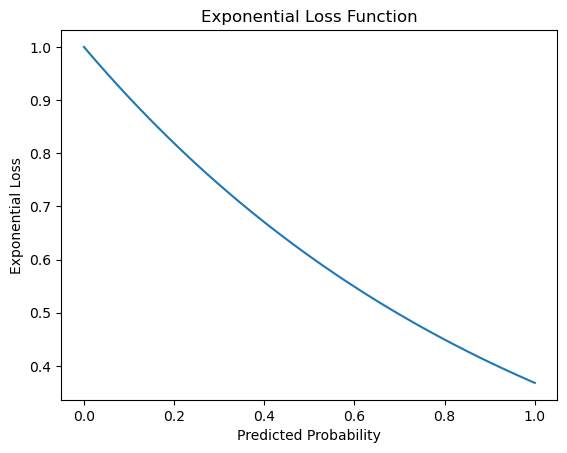

In [1089]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_loss(y, y_pred):
    return np.exp(-y * y_pred)

y_true = 1  # True label (positive class)
y_pred_range = np.linspace(0, 1, 100)  # Range of predicted probabilities

loss_values = [exponential_loss(y_true, y_pred) for y_pred in y_pred_range]

plt.plot(y_pred_range, loss_values)
plt.xlabel('Predicted Probability')
plt.ylabel('Exponential Loss')
plt.title('Exponential Loss Function')
plt.show()

In [1090]:
gbc.fit()

Buiding Trees...


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:08<00:00, 13.71s/it]


In [1092]:
predictions = gbc.predict(ds['data'])

In [1093]:
# accuracy
(predictions == ds['target']).sum() / ds['target'].shape[0]

0.6274165202108963

### Neural Networks (Vanilla)

* Let's build a simple NN with Input => Hidden => Output (also called as Multi-layer perceptron)
* Forward Pass:

$$  z^{(1)} = W^{(1)} \cdot x + b^{(1)} $$

$$ a^{(1)} = \text{ReLU}(z^{(1)}) = \max(0, z^{(1)}) $$

$$    z^{(2)} = W^{(2)} \cdot a^{(1)} + b^{(2)} $$

$$    \hat{y} = \text{Softmax}(z^{(2)}) = \frac{e^{z^{(2)}}}{\sum_{j} e^{z^{(2)}_j}} $$

$$    \mathcal{L} = -\frac{1}{m} \sum_{i=1}^{m} y_i \log(\hat{y}_i) $$

* Backward Pass:

    * Gradient of Cross entropy  $$\frac{\partial \mathcal{L}}{\partial z^{(2)}} = \hat{y} - y $$
    * Hidden layer $$ \frac{\partial \mathcal{L}}{\partial W^{(2)}} = a^{(1)T} \cdot \frac{\partial \mathcal{L}}{\partial z^{(2)}} $$
  $$ \frac{\partial \mathcal{L}}{\partial b^{(2)}} = \frac{\partial \mathcal{L}}{\partial z^{(2)}} $$
    * Hidden layer activation
  $$ \frac{\partial \mathcal{L}}{\partial a^{(1)}} = \frac{\partial \mathcal{L}}{\partial z^{(2)}} \cdot W^{(2)T} $$
    * Input layer
  $$ \frac{\partial \mathcal{L}}{\partial z^{(1)}} = \frac{\partial \mathcal{L}}{\partial a^{(1)}} \cdot \mathbf{1}_{z^{(1)} > 0} $$
$$ \frac{\partial \mathcal{L}}{\partial W^{(1)}} = x^T \cdot \frac{\partial \mathcal{L}}{\partial z^{(1)}} $$
$$ \frac{\partial \mathcal{L}}{\partial b^{(1)}} = \frac{\partial \mathcal{L}}{\partial z^{(1)}} $$

In [130]:
def Relu(x):
    return np.maximum(0,x)

In [256]:
def softmax(x):
    # for numerical stability
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1,keepdims=True)

In [228]:
def forward_pass(X,W1,b1,W2,b2):
    z1 = np.dot(X,W1) + b1
    A1 = Relu(z1)
    z2 = np.dot(A1,W2)+ b2
    A2 = softmax(z2)
    return z1, A1, z2, A2

In [229]:
def init_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.random.randn(1, hidden_size)
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.random.randn(1, output_size)
    return W1, b1, W2, b2

In [230]:
def backward_prop(X,y,z1,A1,A2,W2):
    # retun all gridents
    dz2 = (A2- y) / X.shape[0]
    dw2 = np.dot(A1.T,dz2)
    db2 = np.sum(dz2,axis=0,keepdims=True)
    da1 = np.dot(dz2,W2.T)
    dz1 = da1 * (z1 > 0)
    dw1 = np.dot(X.T,dz1)
    db1 = np.sum(dz1,axis=0,keepdims=True)
    return dw1, db1, dw2, db2

In [231]:
def update_parameters(W1, W2, b1, b2, dw1, dw2, db1, db2, learning_rate):
    W1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [232]:
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

In [233]:
def cross_entropy_loss(y_true, y_pred):
    # numerical stability
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    log_loss= -np.sum(y_true * np.log(y_pred))
    return log_loss / y_pred.shape[0]

In [234]:
# cross_entropy_loss(Y_train,np.random.randn(100,10))

In [289]:
def train(X,y,input_size,hidden_size,output_size,learning_rate=0.01,n_epochs=1000):
    # init parameters
    W1, b1, W2, b2 = init_parameters(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    loss_vals = []
    for i in range(n_epochs):
        # forward pass
        z1, A1, z2, A2 = forward_pass(X,W1,b1,W2,b2)
        # compute loss
        loss = cross_entropy_loss(y,A2)
        # backward pass
        dw1, db1, dw2, db2 = backward_prop(X,y,z1,A1,A2,W2)
        # update weights using dgrads
        W1, b1, W2, b2 = update_parameters(W1, W2, b1, b2, dw1, dw2, db1, db2, learning_rate)
        # track loss
        loss_vals.append(loss)
    return loss_vals, W1, b1, W2, b2

In [290]:
X_train = np.random.rand(10, 10)   # 100 samples, 3 features
Y_train = np.random.randint(0, 2, 10)  # 100 samples (10 classes)
Y_train = one_hot_encode(Y_train,2)

In [291]:
loss, W1, b1, W2, b2 = train(X_train,Y_train,10,5,2)

<Axes: >

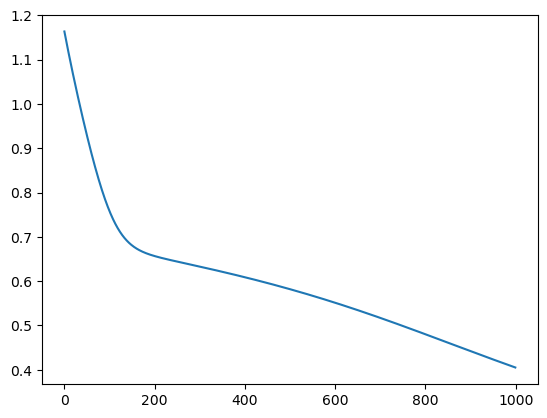

In [292]:
sns.lineplot(loss)

On digits dataset

In [293]:
from sklearn.datasets import load_digits
digits = load_digits()

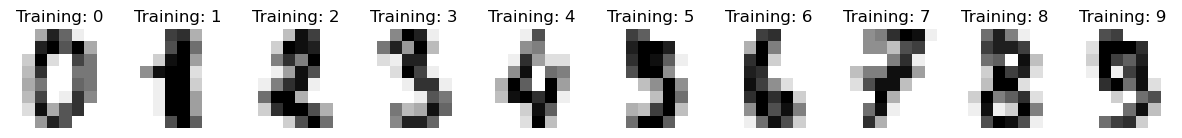

In [330]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [295]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))

In [296]:
X.shape

(1797, 64)

In [297]:
Y = one_hot_encode(digits.target,10)

In [298]:
Y.shape

(1797, 10)

In [299]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [300]:
X_train.shape

(1203, 64)

In [301]:
y_train.shape

(1203, 10)

In [302]:
loss, W1, b1, W2, b2 = train(X_train,y_train,64,16,10)

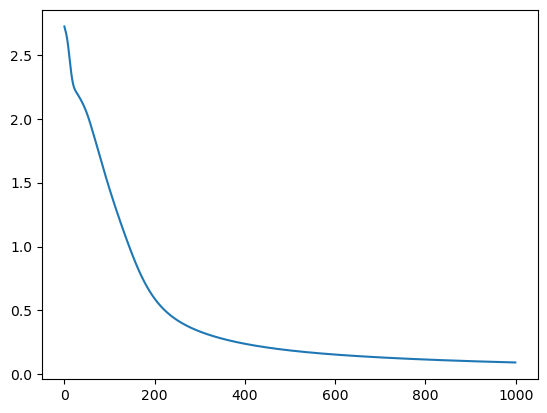

In [331]:
_ = sns.lineplot(loss)

In [306]:
# predictions
_,_,_,preds = forward_pass(X_test,W1,b1,W2,b2)

In [316]:
predicted = np.argmax(preds,axis=1)

In [314]:
# accuracy
(np.argmax(preds,axis=1) == np.argmax(y_test,axis=1)).sum() / len(y_test)

0.9478114478114478

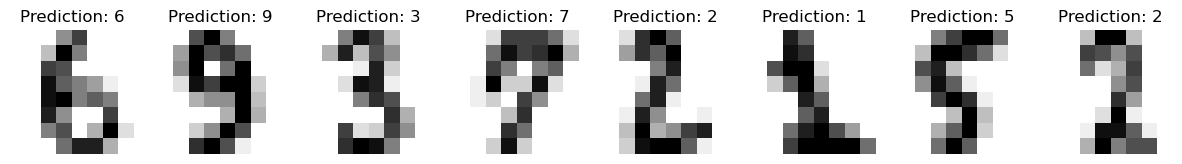

In [327]:
_, axes = plt.subplots(nrows=1, ncols=8, figsize=(15, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

### Optimizers

#### SGD and Momentum

* Optimizers play a crucial role in training neural networks by updating the weights and biases in a way that minimizes the loss function.
    * SGD
    * Momentum
    * RMSProp
    * Adam
* SGD: Simplest. Update the weights by moving in negative direction of loss
$$ \theta = \theta - \eta \cdot \nabla_\theta J(\theta) $$
* Momentum:
    * SGD may get struck in local minima
    * Momentum helps accelerate SGD in the relevant direction and dampens oscillations.
    * It does this by adding a fraction of previous update to the current update.
        * $v$ is the velocity (accumulated gradient).
        * $\gamma $ is the momentum term (usually between 0.8 and 0.99).
$$ v = \gamma v + \eta \cdot \nabla_\theta J(\theta) $$

$$ \theta = \theta - v $$



In [333]:
def momentum_update(params, grads, velocities, learning_rate, momentum=0.9):
    for i in range(len(params)):
        velocities[i] = momentum * velocities[i] + learning_rate * grads[i]
        params[i] -= velocities[i]
    return params, velocities

#### RMSProp
    * RMSProp divides the learning rate for a weight by a running average of the magnitudes of recent gradients for that weight.
        * $ E[g^2]_t $is the moving average of the squared gradients.
        * $ \rho $ is the decay rate (typically 0.9).
        * $ \epsilon $ is a small value to prevent division by zero.
$$ E[g^2]_t = \rho E[g^2]_{t-1} + (1 - \rho) g_t^2 $$
$$ \theta = \theta - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t $$

* Not so intuitive. Let's simulate some gradients and see

In [334]:
# Simulate gradients for 100 iterations
np.random.seed(42)
gradients = np.random.randn(100) * 0.1  # Simulated noisy gradients

In [342]:
def rms_prop(gradients, decay_rate, epsilon=1e-8):
    running_rms_grad = []
    avg_rms_grad = 0
    for g in gradients:
        avg_rms_grad = decay_rate * avg_rms_grad + (1-decay_rate) * g**2
        running_rms_grad.append(avg_rms_grad)
    return running_rms_grad

In [343]:
# Different decay rates to visualize
decay_rates = [0.5, 0.9, 0.99]

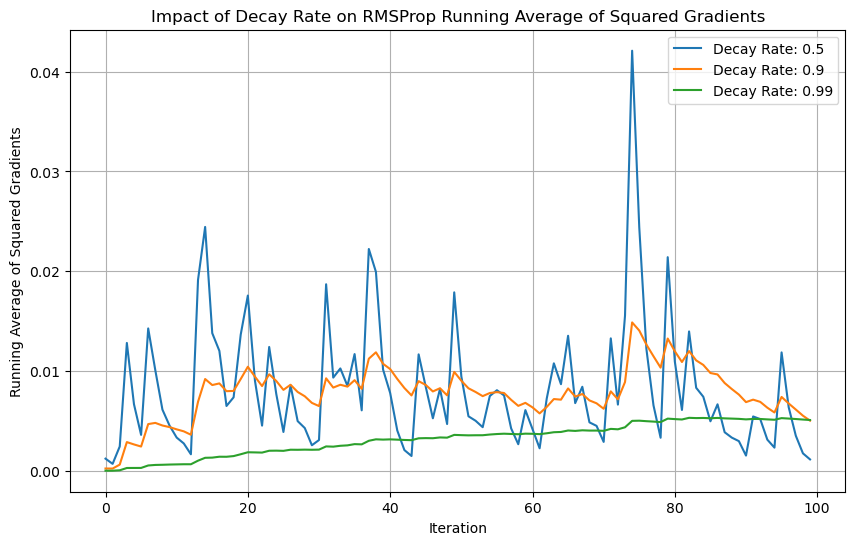

In [344]:
# Plot the running average of squared gradients for different decay rates
plt.figure(figsize=(10, 6))

for decay_rate in decay_rates:
    running_avg_sq_grad = rms_prop(gradients, decay_rate)
    plt.plot(running_avg_sq_grad, label=f'Decay Rate: {decay_rate}')

plt.title('Impact of Decay Rate on RMSProp Running Average of Squared Gradients')
plt.xlabel('Iteration')
plt.ylabel('Running Average of Squared Gradients')
plt.legend()
plt.grid(True)
plt.show()


* At 0.5, the moving average reacts equally to the current gradient vs past gradients and fluctuates more.
* At 0.9, the fluctuations are less but it still reacts to the current gradient and adjusts to it.
* At 0.99, the fluctuations are smoothened out.

In [365]:
def momentum_sim(gradients, momentum, learning_rate=0.01):
    velocities = []
    v = 0
    for g in gradients:
        v = momentum * v + learning_rate * g
        velocities.append(v)
    return velocities

In [370]:
# Simulate a gradually increasing gradient with some noise
np.random.seed(0)
iterations = 100
gradients = np.linspace(0.1, 1.0, iterations) + np.random.randn(iterations) * 0.1

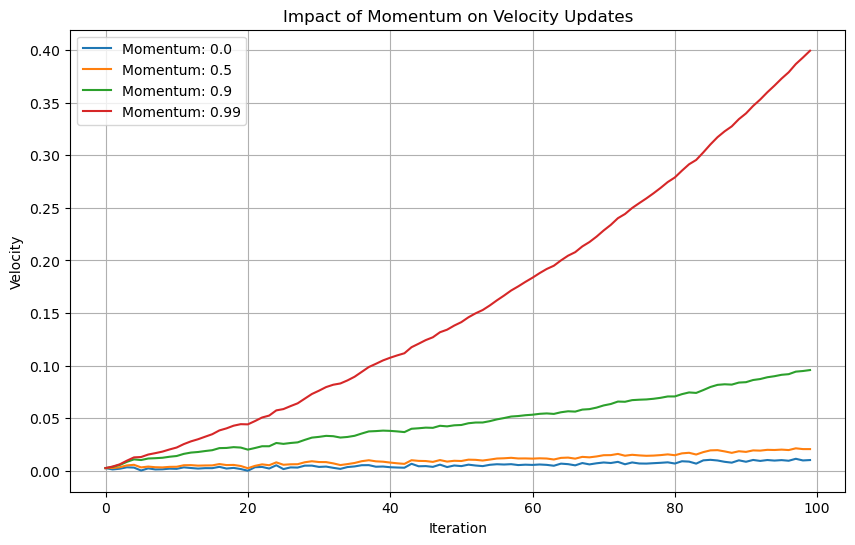

In [371]:
# Different momentum values to visualize
momentum_values = [0.0, 0.5, 0.9, 0.99]

# Plot the velocity updates for different momentum values
plt.figure(figsize=(10, 6))

for momentum in momentum_values:
    velocities = momentum_sim(gradients, momentum)
    plt.plot(velocities, label=f'Momentum: {momentum}')

plt.title('Impact of Momentum on Velocity Updates')
plt.xlabel('Iteration')
plt.ylabel('Velocity')
plt.legend()
plt.grid(True)
plt.show()


* As the momentum increases, the gradients become smooth

#### Adam

* Combines both momentum and RMSProp
    *  $ m_t $  and $ v_t $ are the first and second moments of the gradient.
    * $ \beta_1 $ and $ \beta_2 $ are decay rates for the first and second moments (typically 0.9 and 0.999).
    * $ \hat{m}_t $ and $ \hat{v}_t $ are bias-corrected estimates of the moments.
$$ m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t $$
$$ v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 $$
$$ \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} $$
$$ \theta = \theta - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t $$

In [372]:
def momentum_optimizer(params, grads, m, v, t, 
                       learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = beta1 * m + (1-beta1) * grads
    v = beta2 * v + (1-beta2) * grads ** 2
    m_hat = m / (1- beta1 ** t)
    v_hat = v / (1- beta2 ** t)
    params -= learning_rate * m_hat / (np.sqrt(v_hat + epsilon))
    return params

### Support Vector Machines

* Objective is to find a hyperplane that separates the data into various classes.
* Maximizes margin which is the distance between closest data points of different classes.
* Kernel trick: For non-linear data, transform the data into a space which becomes linearly separable.
* Minimze
$$ \min_{\mathbf{w}, b} \quad \frac{1}{2} \|\mathbf{w}\|^2 $$
Constrained by $$ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \quad \forall i $$
* Loss function
$$  \text{Loss} = \frac{1}{2} \|\mathbf{w}\|^2 + \lambda \sum_{i=1}^n \max(0, 1 - y_i (\mathbf{w} \cdot \mathbf{x}_i + b)) $$
* If the point is correctly classified and far away from the boundary y(wx+b) > 1 => Hinge loss ~= 0
* If the point is incorrectly classified and too close to the boundary y(wx+b) < 1 => Hinge loss = Positive. Larger distance gets penalized more heavily.

In [559]:
class SVM():

    def __init__(self, X, y, learning_rate=0.001,reg=0.01,n_iters=1000):
        self.learning_rate = learning_rate
        self.reg = reg
        self.X = X
        self.y = y
        self.n_iters = n_iters

    def fit(self):
        self.y = np.where(self.y<=0,-1,1)
        self.w = np.random.randn(self.X.shape[1]) * 0.01
        self.b = 0
        for i in range(self.n_iters):
            for index, x_i in enumerate(self.X):
                condition = self.y[index] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # update grads, no penality as margin condition is met
                    # only regularization gets applied
                    self.w -= self.learning_rate * ( self.reg * self.w)
                else:
                    # update grads, penality applicable
                    self.w -= self.learning_rate * (self.reg * self.w - np.dot(x_i,self.y[index]))
                    self.b -= self.learning_rate * self.y[index]

    def predict(self,X):
        output = np.dot(X,self.w)-self.b
        return np.sign(output)

In [560]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [561]:
ss= StandardScaler()

In [562]:
ds = load_breast_cancer()

In [563]:
X,y =ds['data'],ds['target']

In [564]:
X= ss.fit_transform(X)

In [565]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [566]:
svc = SVM(X_train,y_train)

In [567]:
svc.fit()

In [568]:
preds = svc.predict(X_test)

In [569]:
# accuracy
(preds == np.where(y_test<=0,-1,1)).sum() / len(preds)

0.9787234042553191

## Recommender Systems

* Suggest products, content or services to users based up on their preferences and behaviour.
    * Content Based Methods: Only based on users activity and interests
    * Colloborative Filtering: Learned patterns from across the users. Similar users have similar interests.
    * Hybrid: Mixture of content-based and colloborative methods
* Cold-start problem: New users or platforms have very little data, so they can not be directly used to make recommendations. To fix: use domain knowledge, transfer learning from similar problems, recommend based on popularity, geographical bounds, maintain diversity etc.

### Content-Based

In [24]:
def compute_cosine():
    items = np.random.randn(100,20)
    items = items / np.linalg.norm(items,axis=1)[:, None]
    cosine_matrix = np.dot(items, items.T)
    return cosine_matrix
def recommend_using_cosine(i):
    top_k = np.argsort(cosine_matrix[i])[::-1][0:5]
    return top_k

In [25]:
cosine_matrix = compute_cosine()

In [26]:
recommend_using_cosine(0)

array([ 0, 10, 28, 44, 62])

In [27]:
recommend_using_cosine(10)

array([10,  0, 62, 37,  1])

### Colloborative Filtering

* Do matrix factorization of user-item interactions
* User-item => User-latent Item-latent
* You can compute: user-user, item-item, user-item
* Loss: Mean Squared Error

In [98]:
user_item_matrix = np.random.randint(0,1,(100,20))
# 100 users, 20 items

In [99]:
user_item_matrix.shape

(100, 20)

In [113]:
def matrix_factorization(user_item_matrix,k=5,learning_rate=0.1,steps=1000):
    n_users = user_item_matrix.shape[0] 
    n_items = user_item_matrix.shape[1] 
    U = np.random.rand(n_users, k) 
    V = np.random.rand(n_items,k) 
    loss_list = []
    for n in range(steps):
        for i in range(n_users):
            for j in range(n_items):
                rating = user_item_matrix[i][j]
                if rating > 0:
                    err = (rating - np.dot(user_item_matrix[i,:],user_item_matrix[j,:].T))
                    # gradient step
                    for each_k in range(k):
                        U[i][each_k] -= learning_rate * (2 * err * V[j][each_k])
                        V[j][each_k] -= learning_rate * (2 * err * U[i][each_k])
        # compute loss
        loss_iter = np.sum((user_item_matrix - np.dot(U,V.T)) ** 2)
        loss_list.append(loss_iter)
    return U, V, loss_list
                

In [114]:
U,V, loss_list = matrix_factorization(user_item_matrix)

<Axes: >

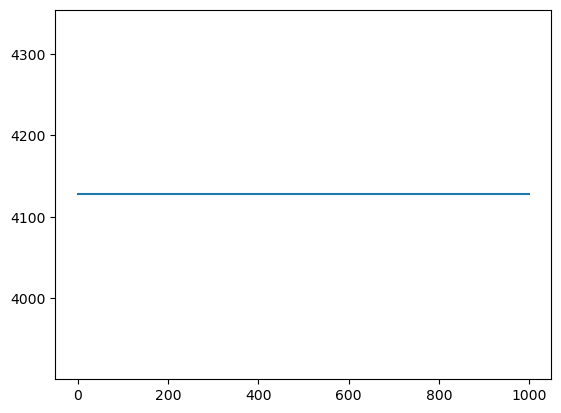

In [116]:
sns.lineplot(loss_list)

## Unsupervised learning